# Maxwell-Boltzmann-distributions
This is the code to generate the figure `Maxwell_Boltzmann_distributions.svg` for the episode about thermostats.

It uses the [MDAnalysis](https://www.mdanalysis.org) packackage to read the velocities from 
GROMACS TRR trajectories (not included) of a series of simulations of water at different temperatures.

In [1]:
import MDAnalysis as mda
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
%ls ../water_themostats/maxwell_boltzmann/nvt*.trr

../water_themostats/maxwell_boltzmann/nvt_280k.trr
../water_themostats/maxwell_boltzmann/nvt_300k.trr
../water_themostats/maxwell_boltzmann/nvt_320k.trr
../water_themostats/maxwell_boltzmann/nvt_340k.trr
../water_themostats/maxwell_boltzmann/nvt_360k.trr


### Some exploratory code that's no longer used:

```python
u = mda.Universe('../water_themostats/minim_water.gro', '../water_themostats/nvt_300k.trr')

ow = u.select_atoms("name OW")
print(len(ow))
print(np.linalg.norm(ow.atoms.velocities, axis=1))

owater = u.select_atoms("name OW")

for ts in u.trajectory[500:-1:50]:
    v_norm = np.linalg.norm(owater.atoms.velocities, axis=1)
    print(v_norm.size)
```

In [3]:
# some settings
temperatures = [280, 300, 320, 340, 360]
temperatures = [280, 320, 360]

start = 50
stop  = -1
step  = 1

nbins = 200
vmax  = nbins/10.0

# Read data and create histograms
histograms = {}
bins = None
for temp in temperatures:
    temp = str(temp)

    # read a trajectory into "Universe"
    u = mda.Universe('../water_themostats/minim_water.gro', 
                     '../water_themostats/maxwell_boltzmann/nvt_' + temp + 'k.trr' )

    # select the water's Oxygen atoms
    owater = u.select_atoms("name OW")

    # read velocity vectors from selected atoms, take the 'norm' and store in NumPy array
    vel_data = np.array([ 
        np.linalg.norm(owater.atoms.velocities, axis=1) for ts in u.trajectory[start:stop:step] 
    ])

    # flatten (reshape) the array into 1D
    vel_data = vel_data.reshape( vel_data.size, 1 )
    
    # calculate histogram
    histograms[temp], bins = np.histogram(vel_data, bins=nbins,range=(0.0, vmax), density=True)
    # the bins returned by np.histogram are 1 element longer that the hist. 
    # So remove the 0.0 element.
    bins = bins[1:]
    # Actually np.histogram returns the bin_edges. It would be more correct to convert it
    # to the mid-points, but for our case it doesn't make much of a difference.
    

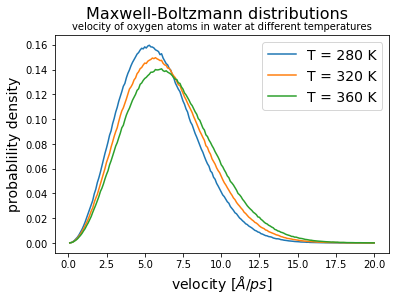

In [4]:
# Plotting
##########
fig = plt.figure(figsize=(6,4))
fontsize=14

# plot the different temperatures
for temp in temperatures:
    temp = str(temp)
    hist = histograms[temp]
    plt.plot(bins, hist, label="T = %s K"%temp,  )

# format the plot
plt.suptitle('Maxwell-Boltzmann distributions', fontsize=fontsize+2)
plt.title('velocity of oxygen atoms in water at different temperatures', fontsize=fontsize-4)
plt.xlabel('velocity $[ \AA / ps ]$', fontsize=fontsize)
plt.ylabel('probablility density', fontsize=fontsize)
plt.legend(loc='upper right', fontsize=fontsize)

# save plot to file and show it below.
plt.savefig('Maxwell_Boltzmann_distributions.svg')
plt.show()